In [1]:
DF_PATH = "../../data/Regression/processed/1_preprocessed_df.pkl"

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
import seaborn as sns


Read Data

In [3]:
df = pd.read_pickle(DF_PATH)

Spliting Data

In [4]:
Y = df["TenYearCHD"]
X = df.drop('TenYearCHD',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

In [5]:
X_train.shape


(2712, 13)

Train models

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


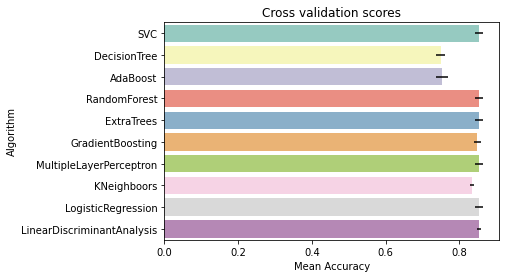

In [6]:
# Modeling step Test differents algorithms 
NFOLDS=5
SEED=0
kf = KFold( n_splits= NFOLDS, random_state=SEED, shuffle=True)
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,warm_start=True))
classifiers.append(ExtraTreesClassifier(random_state=random_state,warm_start=True))
classifiers.append(GradientBoostingClassifier(random_state=random_state,warm_start=True))
classifiers.append(MLPClassifier(random_state=random_state,warm_start=True))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state,warm_start=True))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kf, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})    
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

